# PyTorch MNIST example dissected

In this notebook we'll explore the components of the
[PyTorch MNIST example](https://github.com/pytorch/examples/tree/master/mnist)
one-by-one.

* Part 1: [Loading the data](1_mnist_load.ipynb) <-- **you are here**
* Part 2: [Model components and forward propagation](2_mnist_model.ipynb)
* Part 3: [Autodiff and backpropagation](3_mnist_backprop.ipynb)
* Part 4: [Training the model](4_mnist_train.ipynb)
* Part 5: [Visualizing the results](5_mnist_visualize.ipynb)

## 1. Training data

We start with the obligatory imports:

In [1]:
import torch
from torchvision import datasets, transforms

`torchvision` package has a lot of goodies related to image processing. Its `datasets` module already has a MNIST dataset class, and `transforms` has helpers to convert MNIST data to the format that can be used to train our model.

**P.S.** There is also a `torchtext` package for NLP-related tasks.

### 1.1 Loading the data

This is how the MNIST example loads the training data:

In [2]:
dataset = datasets.MNIST(
    '../data', train=True, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))]))

So it downloads the data and caches it in the `../data` directory. Set `train=False` to get the test data.

We can also apply some transformations to the data as we load it. We'll play with it later. For now, we can just remember that `transform` parameter specifies the features' transformations, and the `target_transform` those for the labels.

Here's how the data looks like:

In [3]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ../data
    Transforms (if any): Compose(
                             ToTensor()
                             Normalize(mean=(0.1307,), std=(0.3081,))
                         )
    Target Transforms (if any): None

The actual data is in `dataset.train_data` and `dataset.train_labels` fields:

In [4]:
print("  data:", dataset.train_data.size())
print("labels:", dataset.train_labels.size())

  data: torch.Size([60000, 28, 28])
labels: torch.Size([60000])


i.e. each training example is 28x28 greyscale image, with 1 byte per pixel. Note that we do not apply the transformations to that (internal) data:

In [5]:
dataset.train_data[1]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

We can visualize it:

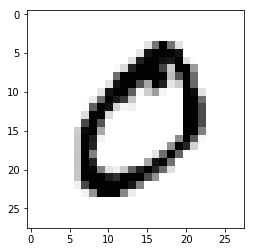

In [17]:
import matplotlib.pyplot as plt

plt.imshow(dataset.train_data[1], interpolation='none', aspect='equal', cmap='Greys')
plt.show()

To actually apply the transformations, we use `dataset.__getitem__()`, i.e.

In [7]:
dataset[1]

(tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.424

That is, for each training example it returns a **pair** of (features, label).

Note the type and size of the data after the transformations:

In [8]:
(features, label) = dataset[1]

print("Features size: %s of type: %s" % (features.size(), features.dtype))
print("Label is: %s of type: %s" % (label, label.dtype))

Features size: torch.Size([1, 28, 28]) of type: torch.float32
Label is: tensor(0) of type: torch.int64


You can plot that data, too - so there is actually no need to reach into `dataset.train_data`:

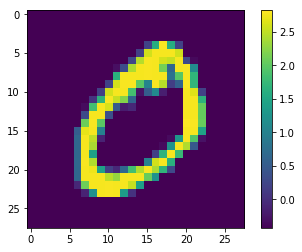

In [9]:
plt.imshow(features[0])
plt.colorbar()
plt.show()

### 1.2 Transforming the data

We can apply the transforms to the raw input data manually, just to see how they work.

Each transform implements the `.__call__()` method that actually transforms the data. Note that this means that the transform can also have a state that cnahges from one input value to the next. (This can be useful e.g. for some sliding window smoothing etc.)

In [10]:
help(transforms.ToTensor)

Help on class ToTensor in module torchvision.transforms.transforms:

class ToTensor(builtins.object)
 |  Convert a ``PIL Image`` or ``numpy.ndarray`` to tensor.
 |  
 |  Converts a PIL Image or numpy.ndarray (H x W x C) in the range
 |  [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0].
 |  
 |  Methods defined here:
 |  
 |  __call__(self, pic)
 |      Args:
 |          pic (PIL Image or numpy.ndarray): Image to be converted to tensor.
 |      
 |      Returns:
 |          Tensor: Converted image.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



Note that `dataset.train_data` is a PyTorch tensor, and `ToTensor()` accepts either a PIL image or a numpy array. I guess that the MNIST dataset performs that conversion implicitly (i.e. it uses `torch.tensor` just for storage). Anyway, we have to call `.numpy()` to make things work here.

Also note that transforms work on **batch** data. Here we convert *two* first examples into a `float32` tensor: 

In [11]:
transformed_data = transforms.ToTensor()(dataset.train_data[:2].numpy())

print("Data size after the transformation: %s\n" % str(transformed_data.size()))
print(transformed_data)

Data size after the transformation: torch.Size([28, 2, 28])

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


So each (`unit8`) pixel is converted into a `float32` value of `[0.0 ... 1.0]` range.

(I have no idea why the batch size dimension slips into the middle between image height and width.)

Transforms are composable:

In [12]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))])

transformed_data = transform(dataset.train_data[:2].numpy())

print("Data size after the transformation: %s\n" % str(transformed_data.size()))
print(transformed_data)

Data size after the transformation: torch.Size([28, 2, 28])

tensor([[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]],

        [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        ...,

        [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]]])


So we end up with the same data as we get from `dataset.__getitem__()` (modulo the weird dimensions).

`transforms.Compose()` applies the transforms as they go in the list, i.e. in our example it first invokes `ToTensor`, and then feeds the resulting tensor into `Normalize`.

### 1.3 Other available datasets and transforms

There are many other prepackaged datasets and transforms available in `torchvision`:

In [13]:
datasets.__all__

('LSUN',
 'LSUNClass',
 'ImageFolder',
 'DatasetFolder',
 'FakeData',
 'CocoCaptions',
 'CocoDetection',
 'CIFAR10',
 'CIFAR100',
 'EMNIST',
 'FashionMNIST',
 'MNIST',
 'STL10',
 'SVHN',
 'PhotoTour',
 'SEMEION',
 'Omniglot')

In [14]:
[clazz for clazz in dir(transforms) if clazz[0].isupper()]

['CenterCrop',
 'ColorJitter',
 'Compose',
 'FiveCrop',
 'Grayscale',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'Pad',
 'RandomAffine',
 'RandomApply',
 'RandomChoice',
 'RandomCrop',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomOrder',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor']

There's also a bunch of functions defined in `transforms.functional` that can come in handy if you have to write your own image transforms.

#### 1.3.1 Note on PIL performance

By default, `torchvision` uses [Pillow](https://python-pillow.org) package as modern replacement of the good old `PIL` Python Image Manipulation library (see [torchvision image backend](https://github.com/pytorch/vision#image-backend)).

If you have a newer generation Intel or AMD chip, you can instead use a drop-in replacement for `Pillow`, called [Pillow-SIMD](https://github.com/uploadcare/pillow-simd), that can utilize AVX and SSE instructions.

To see what instructions are supported on your PC, in Linux you can look at `/proc/cpuinfo` and check gcc capabilities with `gcc --help=target`. 

### 1.4 Dataset and DataLoader

To feed data into the model, PyTorch uses `torch.utils.data.DataLoader` class. It shuffles and batches up the data and parallelizes the loading process. It also loads data into GPU, if it is available.

The data loader's input is an instance of `torch.utils.data.Dataset`. You will inherit from this class if you have your own dataset in some proprietary format. Each dataset must provide random access and iteration over the data, and return the number of batches in `len()` call. In other words, it has to implement `.__getitem__()` and `.__len__()` methods.

The `DataLoader` is also an iterable over the batches; each batch is a pair of (features, labels):

In [15]:
data_loader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

len(data_loader)  # Number of batches

938

In [16]:
data_iter = iter(data_loader)

(features, labels) = data_iter.next()

print("Features:", features.size())
print("  Labels:", labels.size())

Features: torch.Size([64, 1, 28, 28])
  Labels: torch.Size([64])


 Dimension of `1` in the features means that the image is greyscale; it can be, e.g., `3` for RGB pictures.
 
 In [Part 2](2_mnist_model.ipynb) we'll see how training data flows through the model.